# Module 10: Logscale

In [359]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [360]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

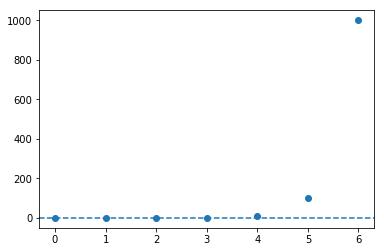

In [361]:
# Implement
x_id = []
for i in range(0, len(x), 1):
    x_id.append(i)
plt.scatter(x_id,ratio)
plt.axhline(y=1, linestyle='--')

**Q: Explain what's bad about this plot.**

##Answer: On a linear scale the granularity of the ratios are not visible

**Q: Can you fix it? **

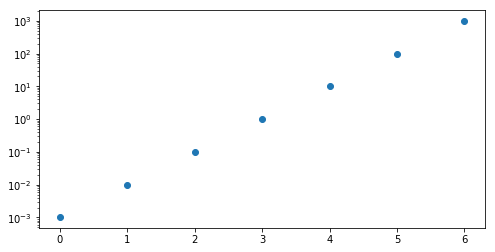

In [362]:
# Implement
# Implement
x_id = []
f = plt.figure(figsize=(8,4))
for i in range(0, len(x), 1):
    x_id.append(i)
    plt.yscale(value = 'log')
plt.scatter(x_id,ratio)
plt.show()

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [363]:
# Implement
import vega_datasets

movies = vega_datasets.data.movies()
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


In [364]:
movies = movies.dropna(subset=['IMDB_Rating', 'IMDB_Votes', 'Rotten_Tomatoes_Rating'])

If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

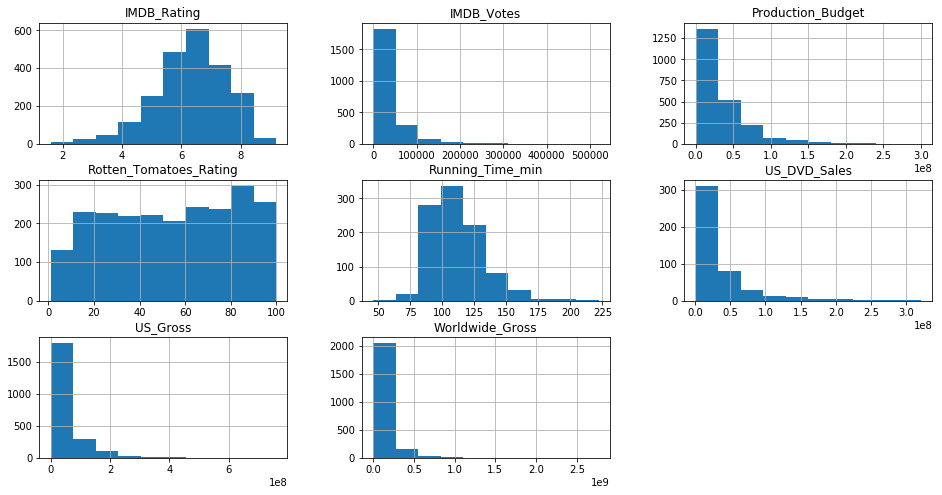

In [365]:
# Implement
plt.rcParams["figure.figsize"] = [16,8]
movies.hist()
plt.show()

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

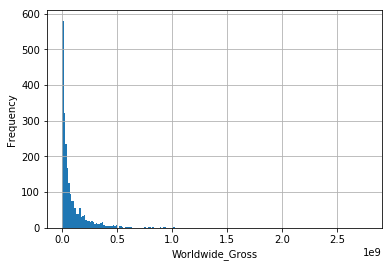

In [366]:
# Implement
f = plt.figure(figsize=(6,4))
movies['Worldwide_Gross'].hist(bins=200)
plt.xlabel('Worldwide_Gross')
plt.ylabel('Frequency')
plt.show()

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

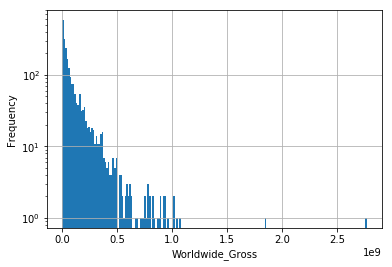

In [367]:
# Implement
# Implement
f = plt.figure(figsize=(6,4))
movies['Worldwide_Gross'].hist(bins=200)
plt.yscale(value = 'log')
plt.xlabel('Worldwide_Gross')
plt.ylabel('Frequency')
plt.show()

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


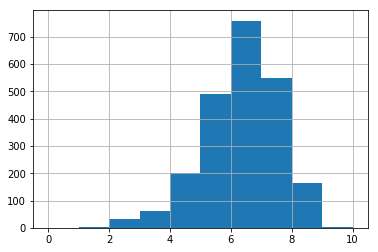

In [368]:
f = plt.figure(figsize=(6,4))
movies.IMDB_Rating.hist(bins=range(0,11))


Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [369]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [370]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0

**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

In [371]:
# Implement
bin_new = np.logspace(np.log10(min(movies.Worldwide_Gross)) , np.log10(max(movies.Worldwide_Gross)) , num=20)

Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

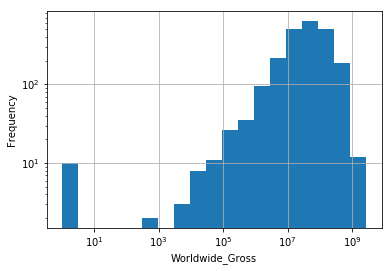

In [372]:
# Implement
f = plt.figure(figsize=(6,4))
movies['Worldwide_Gross'].hist(bins=bin_new)
plt.yscale(value = 'log')
plt.xscale(value = 'log')
plt.xlabel('Worldwide_Gross')
plt.ylabel('Frequency')
plt.show()

What is going on? Is this the right plot?

**Q: explain and fix**

Answer: The dicontinuity in the histogram is due to the fact that there are a number of movies with zero (corrected to 1) and low gross revenues. We can address this either by reducing the binsizes (as below) or filtering out movies with gross revenue less than $ 1000 (plotted below)

In [373]:
bin_newer = np.logspace(np.log10(min(movies.Worldwide_Gross)) , np.log10(max(movies.Worldwide_Gross)) , num=7)

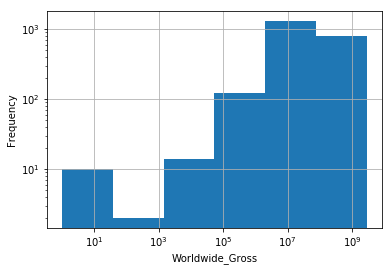

In [374]:
# Adjusting the bin size
f = plt.figure(figsize=(6,4))
movies['Worldwide_Gross'].hist(bins=bin_newer)
plt.yscale(value = 'log')
plt.xscale(value = 'log')
plt.xlabel('Worldwide_Gross')
plt.ylabel('Frequency')
plt.show()

In [381]:
movies_adjusted_gross = movies.loc[(movies.Worldwide_Gross>1000)]

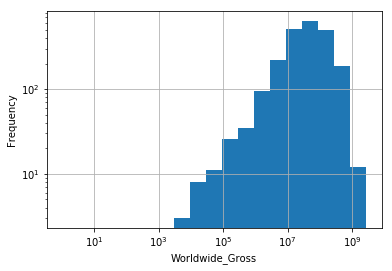

In [382]:
f = plt.figure(figsize=(6,4))
movies_adjusted_gross['Worldwide_Gross'].hist(bins=bin_new)
plt.yscale(value = 'log')
plt.xscale(value = 'log')
plt.xlabel('Worldwide_Gross')
plt.ylabel('Frequency')
plt.show()

**Q: Can you explain the plot? Why are there gaps?**

Answer: Answer: The dicontinuity in the earlier histogram was due to the fact that there are a number of movies with zero (corrected to 1) and low gross revenues. After removong the tail, we get a better representation.

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

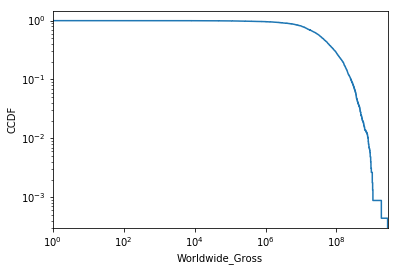

In [383]:
f = plt.figure(figsize=(6,4))
a = movies['Worldwide_Gross']
ser = a.sort_values(ascending = False)
#print(np.sort(a, ascending = True))
#plt.plot(a_sort, np.logspace(0, 1, len(a), endpoint=False))
ser[len(ser)] = ser.iloc[-1]
cum_dist = np.linspace(0.,1.,len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps')
plt.yscale(value = 'log')
plt.xscale(value = 'log')
plt.ylabel('CCDF')
plt.show()

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

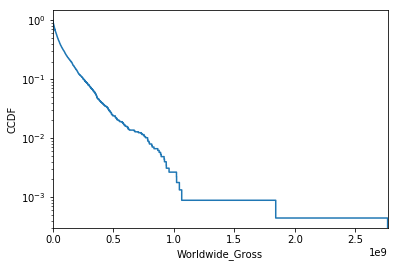

In [384]:
f = plt.figure(figsize=(6,4))
a = movies['Worldwide_Gross']
ser = a.sort_values(ascending = False)
#print(np.sort(a, ascending = True))
#plt.plot(a_sort, np.logspace(0, 1, len(a), endpoint=False))
ser[len(ser)] = ser.iloc[-1]
cum_dist = np.linspace(0.,1.,len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps')
plt.yscale(value = 'log')
plt.ylabel('CCDF')
#plt.xscale(value = 'log')
plt.show()

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

In [385]:
# Implement
#max_index  = movies.idxmax(movies['Worldwide_Gross'], skipna=True)
x, y = movies['Worldwide_Gross'].agg(['max', 'idxmax'])
print(x)
print(y)

2767891500.0
1234.0


Q: Which is the most successful movie in our dataset?
Answer: Avatar (please see below)

In [386]:
max_grosser = movies.loc[1234]['Title']
print("The most succcessful movie is", max_grosser)

The most succcessful movie is Avatar


Question: Which one should you use, loc or iloc? How are they different from each other?
Answer: In this instance, since the index is available and is a non-interger, we should use iloc.

The difference between the two is:

loc gets rows (or columns) with particular labels from the index.
iloc gets rows (or columns) at particular positions in the index (so it only takes integers).